Credit Card Fraud Detection System

First we will import all necessary packages and modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# For logistic regression
from sklearn.linear_model import LogisticRegression

# For anomaly detection models
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

Now lets load the Dataset as Pandas DataFrame

In [3]:
# Load the dataset
df = pd.read_csv('creditcard.csv')

# Lets Check the first few rows of the dataset
print(df.head())

Lets do Some EDA. we can check for null values , datatypes, dependencies and corelations between features.

In [4]:
# Check for missing values
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
# Basic statistics of the data
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [10]:
# dataset informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Lets see distribution of legitimate transactions & fraudulent transactions
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

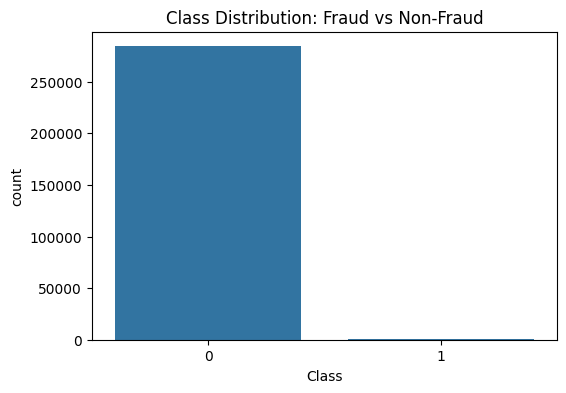

In [7]:
# Plotting the class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title("Class Distribution: Fraud vs Non-Fraud")
plt.show()

In [8]:
# Separate the data into fraud and non-fraud transactions
fraud = df[df['Class'] == 1]   # Fraudulent transactions
non_fraud = df[df['Class'] == 0]  # Non-fraudulent transactions
print(non_fraud.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [11]:
non_fraud.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
# compare the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [15]:
num_fraud = len(fraud)

In [17]:
# Randomly undersample the non-fraudulent transactions to match the number of fraud transactions

non_fraud_sampled = non_fraud.sample(n=num_fraud, random_state=42)

#It randomly samples a subset of non-fraudulent transactions (non_fraud) equal to the number of fraudulent transactions (num_fraud).
# .sample(n=num_fraud, random_state=42) ensures that we select the same number of non-fraud samples as fraud samples and adds reproducibility (random_state=42 ensures consistency in sampling).

In [18]:
# Combine the undersampled non-fraud transactions with the fraud transactions to create a balanced dataset

balanced_df = pd.concat([fraud, non_fraud_sampled])

# It concatenates the sampled non-fraud transactions with all fraudulent transactions to form a balanced dataset (balanced_df).

In [19]:
# Shuffle the rows in the balanced dataset to mix the fraud and non-fraud cases

balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# The resulting balanced dataset is shuffled to mix both classes randomly.
# .sample(frac=1, random_state=42) shuffles the entire dataset, and .reset_index(drop=True) drops the old index and reassigns it.

In [20]:
# Now Lets Check the class distribution of our balanced dataset
print("Class distribution after undersampling:\n", balanced_df['Class'].value_counts())

Class distribution after undersampling:
 Class
0    492
1    492
Name: count, dtype: int64


In [21]:
# lets see top values of our new balanced Dataset
balanced_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,157278.0,1.984787,-1.937036,0.486613,-1.245536,-2.518536,-0.544524,-1.819244,-0.074875,-0.659777,...,0.174011,0.889289,0.218248,0.492384,-0.584599,-0.135040,0.070319,-0.000205,120.00,0
1,153875.0,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,...,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,0.00,1
2,56424.0,0.319007,-1.072867,-0.216146,1.494709,-0.627063,-0.761867,0.941687,-0.430272,-0.267431,...,0.332521,-0.022461,-0.537691,0.452072,0.555495,-0.383543,-0.068520,0.106578,484.00,0
3,150139.0,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,-1.315646,...,0.220526,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,237.26,1
4,85285.0,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,...,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,252.92,1


In [22]:
# Now we will compare the values for both transactions in our balanced Dataset
balanced_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95052.758130,0.153312,0.009649,-0.038029,-0.027323,0.061966,-0.053962,0.013795,0.014911,0.037348,...,0.015030,0.014059,-0.020781,0.013223,-0.007257,0.024646,-0.027696,0.011070,-0.002305,80.348354
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


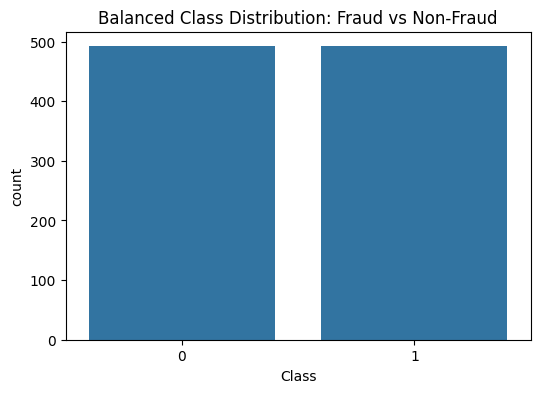

In [23]:
# Plot the balanced class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=balanced_df)
plt.title("Balanced Class Distribution: Fraud vs Non-Fraud")
plt.show()

In [24]:
# Separate features (X) and target variable (y) in the balanced dataset

X = balanced_df.drop(columns='Class',axis=1)
y = balanced_df['Class']


In [25]:
print(X)

         Time        V1        V2        V3        V4        V5        V6  \
0    157278.0  1.984787 -1.937036  0.486613 -1.245536 -2.518536 -0.544524   
1    153875.0 -0.613696  3.698772 -5.534941  5.620486  1.649263 -2.335145   
2     56424.0  0.319007 -1.072867 -0.216146  1.494709 -0.627063 -0.761867   
3    150139.0 -6.682832 -2.714268 -5.774530  1.449792 -0.661836 -1.148650   
4     85285.0 -6.713407  3.921104 -9.746678  5.148263 -5.151563 -2.099389   
..        ...       ...       ...       ...       ...       ...       ...   
979   40662.0 -4.446847 -0.014793 -5.126307  6.945130  5.269255 -4.297177   
980   84789.0 -1.430864 -0.802529  1.123320  0.389760 -0.281214 -0.055123   
981  164776.0  1.947737  0.009899 -1.244776  1.302383  0.040133 -1.067379   
982  150138.0 -2.150855  2.187917 -3.430516  0.119476 -0.173210  0.290700   
983   37167.0 -7.923891 -5.198360 -3.000024  4.420666  2.272194 -3.394483   

           V7        V8        V9  ...       V20       V21       V22  \
0  

In [26]:
print(y)

0      0
1      1
2      0
3      1
4      1
      ..
979    1
980    1
981    0
982    1
983    1
Name: Class, Length: 984, dtype: int64


In [27]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Lets Check the shape of the training and test sets

print("Training set size:") 
print(X.shape, X_train.shape, X_test.shape)

Training set size:
(984, 30) (787, 30) (197, 30)


In [29]:
scaler = StandardScaler()

# Scale the training data

X_train_scaled = scaler.fit_transform(X_train)

# Scale the test data

X_test_scaled = scaler.transform(X_test)

In [30]:
# Initialize Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [31]:
# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test_scaled)

In [32]:
# Print classification report
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94        87
           1       0.99      0.91      0.95       110

    accuracy                           0.94       197
   macro avg       0.94      0.95      0.94       197
weighted avg       0.95      0.94      0.94       197



In [33]:
# Print accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", accuracy_log_reg)

Logistic Regression Accuracy: 0.9441624365482234


In [35]:
# accuracy on training data
X_train_prediction = log_reg.predict(X_train_scaled)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [36]:
# accuracy on test data
X_test_prediction = log_reg.predict(X_test_scaled)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [37]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.951715374841169


In [38]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9441624365482234


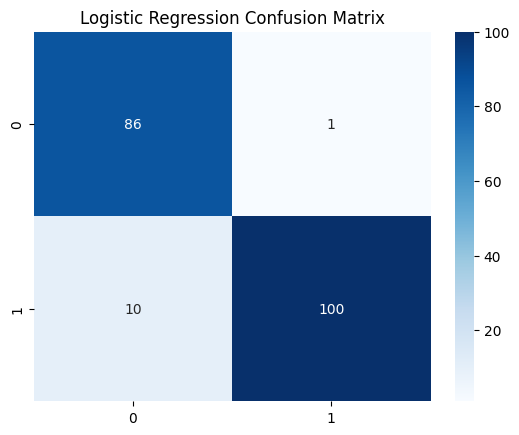

In [39]:
# Lets visualize Confusion matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [40]:
# Initialize Isolation Forest model

iso_forest = IsolationForest(contamination=0.01, random_state=42)


In [41]:
# Train the model

iso_forest.fit(X_train_scaled)

# Predict on the test set

y_pred_iso_forest = iso_forest.predict(X_test_scaled)

In [42]:
# Now Lets Convert Isolation Forest predictions: map 1 for non-fraud (0) and -1 for fraud (1)

y_pred_iso_forest = np.where(y_pred_iso_forest == 1, 0, 1)

In [43]:
# Print classification report

print("Isolation Forest Classification Report:\n", classification_report(y_test, y_pred_iso_forest))

Isolation Forest Classification Report:
               precision    recall  f1-score   support

           0       0.45      1.00      0.62        87
           1       1.00      0.03      0.05       110

    accuracy                           0.46       197
   macro avg       0.72      0.51      0.34       197
weighted avg       0.76      0.46      0.30       197



In [44]:
# Print accuracy

accuracy_iso_forest = accuracy_score(y_test, y_pred_iso_forest)
print("Isolation Forest Accuracy:", accuracy_iso_forest)

Isolation Forest Accuracy: 0.45685279187817257


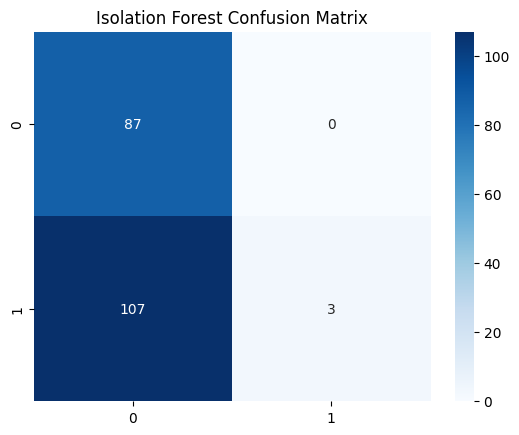

In [45]:
# Confusion matrix of Isolation Forest

conf_matrix_iso_forest = confusion_matrix(y_test, y_pred_iso_forest)
sns.heatmap(conf_matrix_iso_forest, annot=True, fmt='d', cmap='Blues')
plt.title("Isolation Forest Confusion Matrix")
plt.show()

In [46]:
# Initialize One-Class SVM model

oc_svm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.05)

# Train the model

oc_svm.fit(X_train_scaled)

OneClassSVM(gamma='auto', nu=0.05)

Parameters of OneClassSVM:

kernel='rbf': This defines the Radial Basis Function (RBF) kernel. It is the most commonly used kernel for SVM models.

gamma='auto': This parameter controls how far the influence of a single training example reaches. When gamma='auto', it means that the kernel coefficient will be set to 1 / number_of_features. 

nu=0.05: This is an important parameter that defines the upper bound on the fraction of training errors (the number of observations that are classified as anomalies) and a lower bound on the fraction of support vectors. In this case, nu=0.05 means the model expects around 5% of the data to be anomalies (fraudulent transactions).

In [47]:
# Predict on the test set

y_pred_oc_svm = oc_svm.predict(X_test_scaled)

In [48]:
# Converting the  predictions: 1 for non-fraud (0) and -1 for fraud (1)

y_pred_oc_svm = np.where(y_pred_oc_svm == 1, 0, 1)

In [49]:
# Lets Print classification report

print("One-Class SVM Classification Report:\n", classification_report(y_test, y_pred_oc_svm))

One-Class SVM Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.97      0.62        87
           1       0.80      0.11      0.19       110

    accuracy                           0.49       197
   macro avg       0.63      0.54      0.41       197
weighted avg       0.65      0.49      0.38       197



In [50]:
# now Print accuracy

accuracy_oc_svm = accuracy_score(y_test, y_pred_oc_svm)
print("One-Class SVM Accuracy:", accuracy_oc_svm)

One-Class SVM Accuracy: 0.4873096446700508


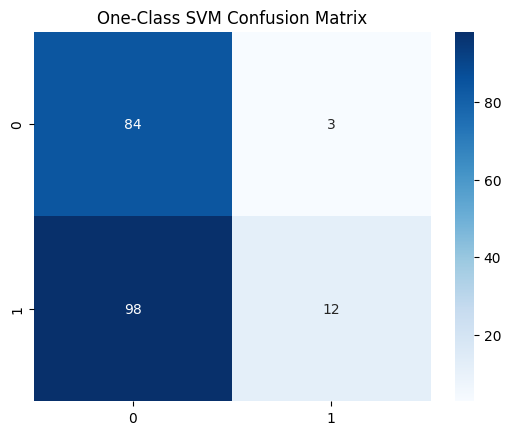

In [51]:
# Confusion matrix of OneClassSVM

conf_matrix_oc_svm = confusion_matrix(y_test, y_pred_oc_svm)
sns.heatmap(conf_matrix_oc_svm, annot=True, fmt='d', cmap='Blues')
plt.title("One-Class SVM Confusion Matrix")
plt.show()

In [52]:
# First of all we will Print accuracy scores of all models

print("Logistic Regression Accuracy:", accuracy_log_reg)
print("Isolation Forest Accuracy:", accuracy_iso_forest)
print("One-Class SVM Accuracy:", accuracy_oc_svm)

Logistic Regression Accuracy: 0.9441624365482234
Isolation Forest Accuracy: 0.45685279187817257
One-Class SVM Accuracy: 0.4873096446700508


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8064\3387967786.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


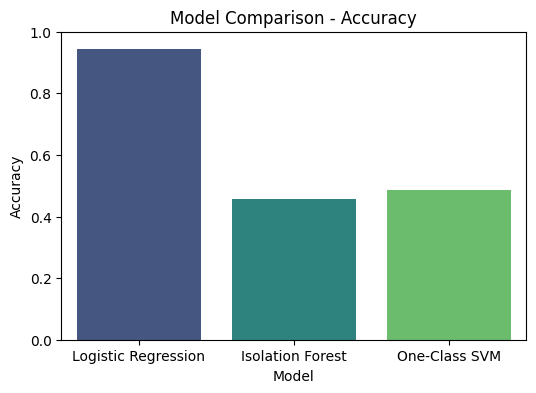

In [54]:
# lets have some visual representation of this

# Creating a bar plot to compare accuracy our models..

models = ['Logistic Regression', 'Isolation Forest', 'One-Class SVM']
accuracies = [accuracy_log_reg, accuracy_iso_forest, accuracy_oc_svm]

plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title("Model Comparison - Accuracy")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

From the above bar chart, it seems Logistic Regression works well for our problem. 
After undersampling, it shows strong performance with high accuracy.

Isolation Forest is much suitable for anomaly detection. 
this model detects fraud as an outlier. 
the results are not as good as Logistic Regression for this case.

One-Class SVM (Designed for anomaly detection), works well for imbalanced data or unlabeled datasets. 
Here,again it is less effective than Logistic Regression.

We can also use SMOTE instead of Random sampling.
It provides a straightforward way to balance the dataset. 

From the results, 
Logistic Regression provides the best performance when the dataset is balanced and labeled. 
Unsupervised models like Isolation Forest and One-Class SVM work decently but are more suitable for real-time detection when labels are unavailable.